In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
data = pd.read_csv("/opt/ml/input/data/train_data.csv", index_col= False)

In [45]:
data.drop(labels=['userID','assessmentItemID', 'Timestamp', 'KnowledgeTag'], axis=1, inplace=True)
data.head(10)

,testId,answerCode
0,A060000001,1
1,A060000001,1
2,A060000001,1
3,A060000001,1
4,A060000001,1
5,A060000001,1
6,A060000003,0
7,A060000003,1
8,A060000003,1
9,A060000003,1


In [46]:
correct = data[data["answerCode"] > 0]
wrong = data[data["answerCode"] == 0]

## 정답과 오답의 비율

In [47]:
print(len(correct) / len(wrong))

1.893337979859098


### 문제집의 정답 오답 비율

In [48]:
test_correct = correct.groupby(["testId"])["answerCode"].count()
test_wrong = wrong.groupby(["testId"])["answerCode"].count()

In [49]:
test_describe = pd.merge(test_correct,test_wrong,on="testId").reset_index(0)
test_describe.columns = ["testId","correct_cnt","wrong_cnt"]
test_describe.head(5)

,testId,correct_cnt,wrong_cnt
0,A010000001,1468,117
1,A010000002,1444,106
2,A010000003,1367,248
3,A010000004,1360,180
4,A010000005,1364,231


In [50]:
test_describe['ratio'] = test_describe.apply(lambda row: row.wrong_cnt / row.correct_cnt, axis = 1)
test_describe.head(10)

,testId,correct_cnt,wrong_cnt,ratio
0,A010000001,1468,117,0.079700
1,A010000002,1444,106,0.073407
2,A010000003,1367,248,0.181419
3,A010000004,1360,180,0.132353
4,A010000005,1364,231,0.169355
5,A010000006,1313,237,0.180503
6,A010000007,1291,279,0.216112
7,A010000008,1420,165,0.116197
8,A010000009,1296,294,0.226852
9,A010000010,1331,249,0.187077


In [51]:
test_describe

,testId,correct_cnt,wrong_cnt,ratio
0,A010000001,1468,117,0.079700
1,A010000002,1444,106,0.073407
2,A010000003,1367,248,0.181419
3,A010000004,1360,180,0.132353
4,A010000005,1364,231,0.169355
...,...,...,...,...
1532,A090000070,144,200,1.388889
1533,A090000071,121,239,1.975207
1534,A090000072,113,157,1.389381
1535,A090000073,143,127,0.888112


In [52]:
test_describe.sort_values(by="ratio",ascending=False, inplace = True)

In [53]:
test_describe.head(10)

,testId,correct_cnt,wrong_cnt,ratio
1497,A090000035,479,985,2.056367
1533,A090000071,121,239,1.975207
1371,A080000047,1005,1915,1.905473
1395,A080000071,1019,1885,1.849853
1235,A070000075,459,843,1.836601
1353,A080000029,1025,1879,1.833171
1373,A080000049,1040,1888,1.815385
1479,A090000017,870,1572,1.806897
1486,A090000024,908,1628,1.792952
1199,A070000039,464,826,1.780172


<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:xlabel='correct_cnt', ylabel='wrong_cnt'>>

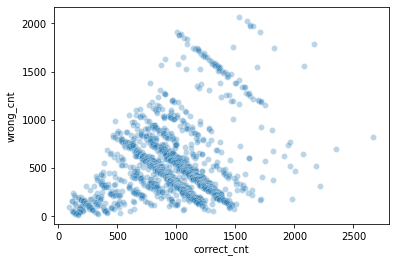

In [54]:
fig = sns.scatterplot(x=test_describe.correct_cnt, y = test_describe.wrong_cnt, alpha= 0.3)
fig.set

## 문제집 대분류 별 정답률

In [56]:
data = pd.read_csv("/opt/ml/input/data/train_data.csv", index_col= False)
data.drop(labels=['userID','assessmentItemID', 'Timestamp', 'KnowledgeTag'], axis=1, inplace=True)
data.head(10)

,testId,answerCode
0,A060000001,1
1,A060000001,1
2,A060000001,1
3,A060000001,1
4,A060000001,1
5,A060000001,1
6,A060000003,0
7,A060000003,1
8,A060000003,1
9,A060000003,1


In [57]:
data["testId"] = data["testId"].apply(lambda x : x[1:4])
data.sample(5)

,testId,answerCode
375624,010,1
118400,050,0
1506573,070,1
793660,020,1
1963084,030,0


In [58]:
data["testId"].unique()

array(['060', '080', '020', '040', '090', '030', '050', '010', '070'],
      dtype=object)

In [59]:
test_groupby = data.groupby("testId")['answerCode'].agg(['sum','count'])

In [60]:
test_groupby['ratio'] = test_groupby['sum'] / test_groupby['count']
test_groupby

,sum,count,ratio
testId,,,
010,217904,272082,0.800876
020,197916,268327,0.737593
030,192246,273762,0.702238
040,182864,267323,0.684056
050,181516,275773,0.658208
060,187545,264434,0.709232
070,145689,279164,0.521876
080,123808,246336,0.502598
090,53717,119385,0.449948


Text(0.5, 1.0, 'Test and answer count')

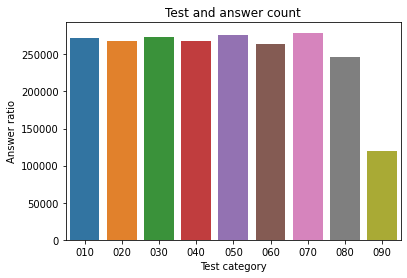

In [69]:
fig = sns.barplot(data = test_groupby,
                 x = test_groupby.index,
                 y = test_groupby['count'])

fig.set_xlabel('Test category')
fig.set_ylabel('Answer ratio')

fig.set_title('Test and answer count')


Text(0.5, 1.0, 'Test and answer ratio')

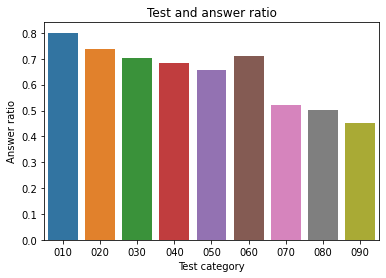

In [62]:
fig = sns.barplot(data = test_groupby,
                 x = test_groupby.index,
                 y = test_groupby.ratio)

fig.set_xlabel('Test category')
fig.set_ylabel('Answer ratio')

fig.set_title('Test and answer ratio')
